In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats
mobile = pd.read_csv(r'C:\Users\harsh\Documents\MarketPositioningofMobile\Market Positioning of Mobile\Dataset\Mobile_data.csv')


In [3]:
mobile.isnull().sum()
mobile.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [5]:
np.abs(stats.zscore(mobile)) < 3
mobile[(np.abs(stats.zscore(mobile)) < 3).all(axis=1)]

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [6]:
mobile.corr()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
battery_power,1.000000,0.011482,0.033334,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.200723
clock_speed,0.011482,1.000000,-0.000434,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.006606
fc,0.033334,-0.000434,1.000000,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.021998
int_memory,-0.004004,0.006545,-0.029133,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,0.044435
m_dep,0.034085,-0.014364,-0.001791,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,0.000853
mobile_wt,0.001844,0.012350,0.023618,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,-0.030302
n_cores,-0.029727,-0.005724,-0.013356,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,0.004399
pc,0.031441,-0.005245,0.644595,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657,0.033599
px_height,0.014901,-0.014523,-0.009990,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.020352,0.059615,0.043038,-0.010645,0.148858
px_width,-0.008402,-0.009476,-0.005176,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.004105,0.021599,0.034699,0.006720,0.165818


In [7]:
mobile.head(20)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
5,1859,0.5,3,22,0.7,164,1,7,1004,1654,1067,17,1,10,1
6,1821,1.7,4,10,0.8,139,8,10,381,1018,3220,13,8,18,3
7,1954,0.5,0,24,0.8,187,4,0,512,1149,700,16,3,5,0
8,1445,0.5,0,53,0.7,174,7,14,386,836,1099,17,1,20,0
9,509,0.6,2,9,0.1,93,5,15,1137,1224,513,19,10,12,0


In [8]:
mobile.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [9]:
print(np.corrcoef(mobile['pc'], mobile['fc']));
print(np.corrcoef(mobile['px_width'], mobile['px_height']));

[[1.         0.64459528]
 [0.64459528 1.        ]]
[[1.         0.51066442]
 [0.51066442 1.        ]]


In [10]:
result = linregress(mobile['pc'], mobile['fc']);
print(result);
print(result.pvalue<0.05);

result2 = linregress(mobile['px_width'], mobile['px_height']);
print(result2);
print(result2.pvalue<0.05);


LinregressResult(slope=0.4614658353893244, intercept=-0.26662595663823474, rvalue=0.6445952827956326, pvalue=2.867092659643001e-235, stderr=0.012244633840620184, intercept_stderr=0.14231957455050556)
True
LinregressResult(slope=0.5243483571689556, intercept=-11.12209639648404, rvalue=0.5106644191393134, pvalue=2.810995381412044e-133, stderr=0.019750312356711944, intercept_stderr=26.149547892645764)
True


In [12]:
from sklearn.model_selection import train_test_split
mobile_train, mobile_test = train_test_split(mobile, test_size = .2)

In [13]:
mobile_train_x  = mobile_train.iloc[: , 0:-1]
mobile_train_y  = mobile_train.iloc[: , -1]

In [14]:
mobile_test_x  = mobile_test.iloc[: , 0:-1]
mobile_test_y  = mobile_test.iloc[: , -1]

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(mobile_train_x, mobile_train_y)
pred_mobiles = knn.predict(mobile_test_x)

In [17]:
from sklearn.metrics import confusion_matrix
tab_mobiles = confusion_matrix(mobile_test_y, pred_mobiles)

In [18]:
accuracy = tab_mobiles.diagonal().sum()/tab_mobiles.sum()
accuracy


0.9175

MSE :  0.32787192621510003
R2 Score :  0.9158166761291333
MSE :  0.31622776601683794
R2 Score :  0.9216899312829147
MSE :  0.2872281323269014
R2 Score :  0.9353941933084047
MSE :  0.32015621187164245
R2 Score :  0.9197321795649875


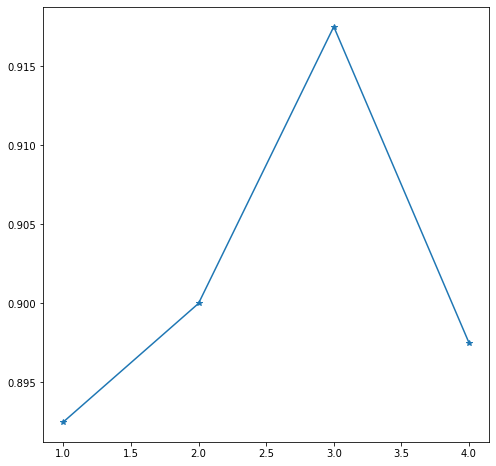

In [21]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score

empty_list = []
k_list = []
for i in range(1,5):
    k_list.append(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(mobile_train_x, mobile_train_y)
    pred_mobiles_knn = knn.predict(mobile_test_x)
    confusion_matrix_knn = confusion_matrix(mobile_test_y, pred_mobiles_knn)
    print("MSE : ",np.sqrt(metrics.mean_squared_error(mobile_test_y, pred_mobiles_knn)))
    print("R2 Score : ",r2_score(mobile_test_y, pred_mobiles_knn))
    Over_all_Accuracy = confusion_matrix_knn.diagonal().sum() / confusion_matrix_knn.sum()
    empty_list.append(Over_all_Accuracy)  
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
plt.plot(k_list, empty_list, marker = '*')
xlabel = k_list

In [22]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# define feature selection
fs = SelectKBest(score_func=f_classif, k=10)
# apply feature selection
X_selected = fs.fit_transform(mobile_test_x, mobile_test_y)
print(X_selected.shape)

(400, 10)
